In [1]:
import pyarrow
import fastparquet
import numpy as np
import pandas as pd

# For Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)

- Fam file contains population/sample information
- Bim file contains information on the SNP position (basepair and centimorgan)
- parquet file contains the snp data

## _`fam` Dataset_

In [58]:
fam = pd.read_csv("HO_data/HO_data_filtered/HumanOrigins2067_filtered.fam", delimiter = " ", header = None).to_numpy()

In [61]:
print(fam[0])

['AA' 'AD_066' 0 0 0 1]


- `dtype('0')` in NumPy stands for "object" data type. This means that the array contains Python objects (e.g., strings, mixed types, or other non-primitive types).


In [6]:
columns = ["Family_ID", "Individual_ID", "Paternal_ID", "Maternal_ID", "Sex", "Phenotype"]

fam_df = pd.read_csv("HO_data/HO_data_filtered/HumanOrigins2067_filtered.fam", sep="\s+", names=columns)

In [7]:
fam_df.head()

,Family_ID,Individual_ID,Paternal_ID,Maternal_ID,Sex,Phenotype
0,AA,AD_066,0,0,0,1
1,AA,AD_064,0,0,0,1
2,AA,AD_505,0,0,0,1
3,AA,AD_523,0,0,0,1
4,AA,AD_500,0,0,0,1


*.`fam (Sample Information)`: Contains family structure, individual ID, parental ID, sex, and phenotype. Links individuals to their genotype data.*


In [8]:
fam_df.Family_ID.value_counts()

Family_ID
Yoruba             70
French             61
Turkish            56
Spanish            53
Han                43
                   ..
Datog               3
Australian          3
Dolgan              3
Canary_Islander     2
Saami_WGA           1
Name: count, Length: 166, dtype: int64

In [9]:
(fam_df['Family_ID'] == "Yoruba").sum()

np.int64(70)

In [10]:
fam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Family_ID      2067 non-null   object
 1   Individual_ID  2067 non-null   object
 2   Paternal_ID    2067 non-null   int64 
 3   Maternal_ID    2067 non-null   int64 
 4   Sex            2067 non-null   int64 
 5   Phenotype      2067 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 97.0+ KB


In [11]:
fam_df.describe()

,Paternal_ID,Maternal_ID,Sex,Phenotype
count,2067.0,2067.0,2067.0,2067.0
mean,0.0,0.0,0.0,1.0
std,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,1.0
25%,0.0,0.0,0.0,1.0
50%,0.0,0.0,0.0,1.0
75%,0.0,0.0,0.0,1.0
max,0.0,0.0,0.0,1.0


In [12]:
# Count how many unique Family IDs
unique_families = np.unique(fam_df.iloc[:, 0])

f"Number of unique family IDs: {len(unique_families)}"

'Number of unique family IDs: 166'

In [13]:
duplicate_rows_fam_df = fam_df[fam_df.duplicated()]

"number of duplicate rows: ", duplicate_rows_fam_df.shape

('number of duplicate rows: ', (0, 6))

In [14]:
phenotype_column = fam_df.iloc[:, 5]

# Count the number of affected individuals
affected = np.sum(phenotype_column == 1)
print(f"Number of affected individuals: {affected}")

Number of affected individuals: 2067


## _`bim` Dataset_
 *This `.bim file` is a `PLINK BIM` (binary map) file used in genetics and bioinformatics. It provides information about genetic variants (SNPs) in a dataset.*

In [15]:
bim = np.genfromtxt("HO_data/HO_data_filtered/HumanOrigins2067_filtered.bim", usecols=(0, 1, 2, 3, 4, 5), dtype=str)

In [16]:
bim[0]

array(['1', 'rs3094315', '0.020130', '752566', 'G', 'A'], dtype='<U16')

- `dtype('<U16')` in NumPy means that the array contains Unicode strings with a maximum length of 16 characters.

In [17]:
columns = ["Chromosome", "SNP_ID", "Genetic_Distance", "Position", "Ref_Allele", "Alt_Allele"]

bim_df = pd.read_csv("HO_data/HO_data_filtered/HumanOrigins2067_filtered.bim", sep="\s+", names=columns)

In [18]:
bim_df.head()

,Chromosome,SNP_ID,Genetic_Distance,Position,Ref_Allele,Alt_Allele
0,1,rs3094315,0.020130,752566,G,A
1,1,rs7419119,0.022518,842013,G,T
2,1,rs13302957,0.024116,891021,G,A
3,1,rs6696609,0.024457,903426,T,C
4,1,rs8997,0.025727,949654,A,G


In [19]:
bim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160858 entries, 0 to 160857
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Chromosome        160858 non-null  int64  
 1   SNP_ID            160858 non-null  object 
 2   Genetic_Distance  160858 non-null  float64
 3   Position          160858 non-null  int64  
 4   Ref_Allele        160858 non-null  object 
 5   Alt_Allele        160858 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 7.4+ MB


*.`bim (Variant Information)`: Contains SNP markers, chromosome number, genetic position, and allele information.*

*.`SNP ID`: unique identifier for this SNP - Reference SNP identifier -rsID*

*.`Genetic Distance`: cM - Centimorgans (may not always be used)*

*.`Physical Position`: this SNP is located at base pair 752,566 on chromosome 1*

*.`Reference Allele`: G - major allele*

*.`Alternative Allele`: A - minor allele*

In [20]:
bim_df.describe()

,Chromosome,Genetic_Distance,Position
count,160858.000000,160858.000000,1.608580e+05
mean,8.991744,0.930690,7.849409e+07
std,5.945411,0.590934,5.802305e+07
min,1.000000,0.000013,1.968800e+04
25%,4.000000,0.473851,3.021285e+07
50%,8.000000,0.848425,6.873518e+07
75%,13.000000,1.299260,1.164211e+08
max,22.000000,2.862305,2.491684e+08


In [33]:
bim_df_duplicate = bim_df[bim_df.duplicated()]

"number of duplicate rows: ", bim_df_duplicate.shape

('number of duplicate rows: ', (0, 6))

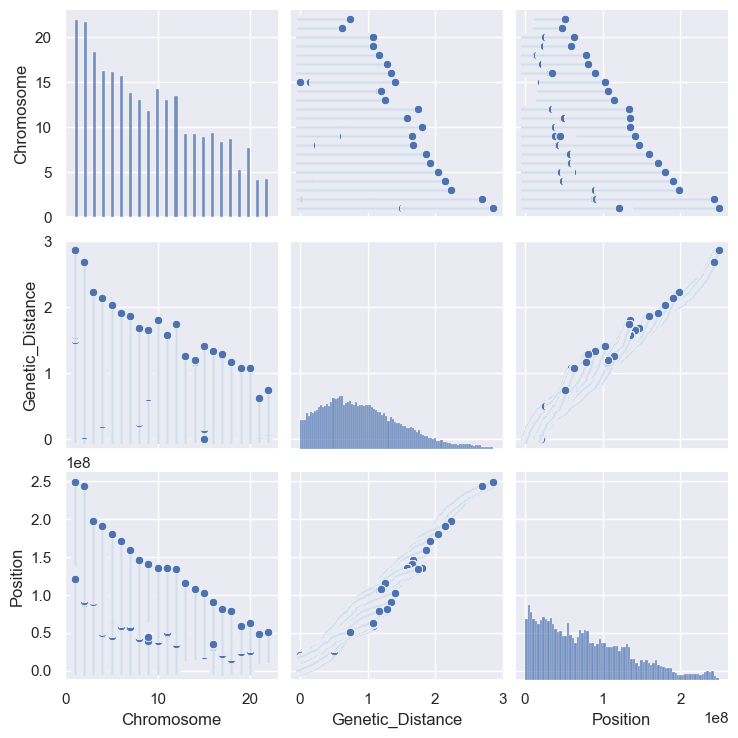

In [40]:
sns.pairplot(bim_df)

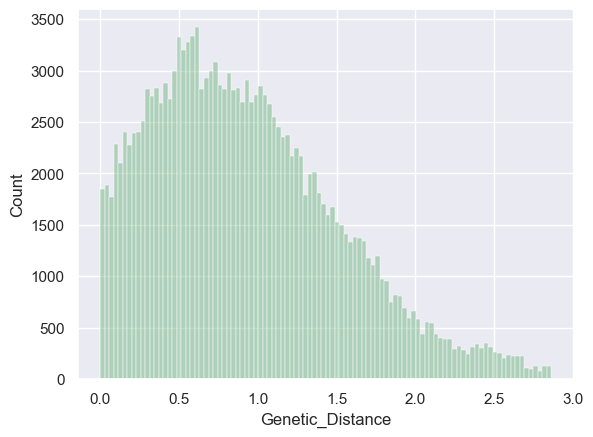

In [41]:
sns.histplot(bim_df['Genetic_Distance'], color='g', bins=100, alpha=0.4)
plt.show()

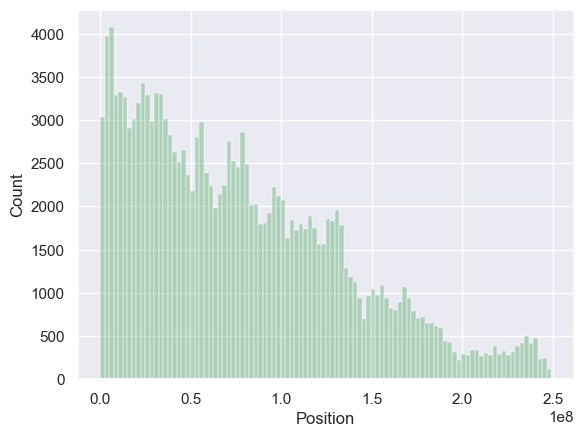

In [42]:
sns.histplot(bim_df['Position'], color='g', bins=100, alpha=0.4)
plt.show()

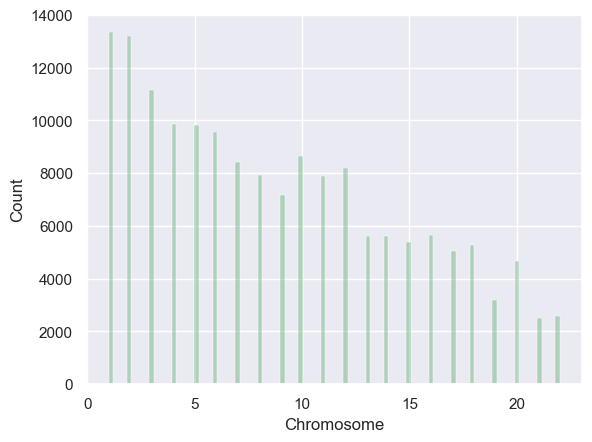

In [43]:
sns.histplot(bim_df['Chromosome'], color='g', bins=100, alpha=0.4)
plt.show()

## _`snp` Dataset_

In [50]:
# load dataset
snp_data = pd.read_parquet("HO_data/HO_data_filtered/HumanOrigins2067_filtered.parquet").to_numpy()

In [52]:
# unique values of xxx
print(np.unique(snp_data))

[0. 1. 2. 9.]


In [ ]:
# numpy to dataframe
snp_data_df = pd.DataFrame(snp_data)

In [54]:
# snp_data_df.info()

In [55]:
# snp_data_df.describe()

In [56]:
snp_data_df.head()

,SNP_0,SNP_1,SNP_2,SNP_3,SNP_4,SNP_5,SNP_6,SNP_7,SNP_8,SNP_9,...,SNP_2058,SNP_2059,SNP_2060,SNP_2061,SNP_2062,SNP_2063,SNP_2064,SNP_2065,SNP_2066,Individual_ID
0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,AD_066
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,AD_064
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,AD_505
3,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,AD_523
4,1.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AD_500


- *This dataset contains genotype data for `160,858` individuals across `2,067` SNP markers. The values `(0, 1, 2)` represent different genotype states for each SNP, indicating the genetic variation between individuals.*

- *`Rows`: Each row corresponds to a person in the dataset - 160,858 individuals (rows)*

- *`Columns`: Each column corresponds to a specific SNP marker- 2,067 SNP markers (columns)*

- *`Values`: The values represent the genotypes for each individual and SNP. Genotypes are typically represented as:*

    - `0: Homozygous` reference (e.g., the individual has two copies of the reference allele).
    - `1: Heterozygous` (e.g., the individual has one copy of the reference allele and one copy of the alternate allele).
    - `2: Homozygous` alternate (e.g., the individual has two copies of the alternate allele).
    - `9: null` represent null/missing data (alternate `-1`)


In [41]:
# Get unique values in each column
unique_values_per_column = snp_data_df.apply(lambda col: col.unique())
unique_values_per_column

SNP_0                                         [1.0, 0.0, 2.0, 9.0]
SNP_1                                         [1.0, 0.0, 2.0, 9.0]
SNP_2                                         [1.0, 0.0, 2.0, 9.0]
SNP_3                                         [1.0, 0.0, 2.0, 9.0]
SNP_4                                         [1.0, 0.0, 2.0, 9.0]
                                       ...                        
SNP_2063                                      [0.0, 1.0, 2.0, 9.0]
SNP_2064                                      [1.0, 0.0, 2.0, 9.0]
SNP_2065                                      [0.0, 1.0, 2.0, 9.0]
SNP_2066                                      [0.0, 1.0, 2.0, 9.0]
Individual_ID    [AD_066, AD_064, AD_505, AD_523, AD_500, AD_51...
Length: 2068, dtype: object

In [29]:
# Check for missing values
missing_values = snp_data_df.isnull().sum()  # Sum of missing values per column
print(missing_values)

0       0
1       0
2       0
3       0
4       0
       ..
2062    0
2063    0
2064    0
2065    0
2066    0
Length: 2067, dtype: int64


## *Minor Allele Frequency*
MAF tells you how common the minor allele (e.g., 1 or 2) is in the population.

In [44]:
def maf(snp_column):
    counts = snp_column.value_counts(normalize=True)
    return min(counts)  # Minor allele frequency is the least frequent value

maf_values = snp_data_df.drop('Individual_ID', axis=1).apply(maf)
print(maf_values)

SNP_0       0.004725
SNP_1       0.005191
SNP_2       0.001946
SNP_3       0.004992
SNP_4       0.003444
              ...   
SNP_2062    0.002686
SNP_2063    0.003164
SNP_2064    0.002462
SNP_2065    0.002928
SNP_2066    0.002754
Length: 2067, dtype: float64


In [32]:
snp_data_df.columns

Index(['SNP_0', 'SNP_1', 'SNP_2', 'SNP_3', 'SNP_4', 'SNP_5', 'SNP_6', 'SNP_7',
       'SNP_8', 'SNP_9',
       ...
       'SNP_2058', 'SNP_2059', 'SNP_2060', 'SNP_2061', 'SNP_2062', 'SNP_2063',
       'SNP_2064', 'SNP_2065', 'SNP_2066', 'Individual_ID'],
      dtype='object', length=2068)

In [33]:
snp_data_df["Individual_ID"] = fam_df["Individual_ID"]  # Add Individual ID

# .Fam + snp
merged_df = fam_df.merge(snp_data_df, on="Individual_ID")  # Merge phenotype & genotypes

In [34]:
merged_df

,Family_ID,Individual_ID,Paternal_ID,Maternal_ID,Sex,Phenotype,SNP_0,SNP_1,SNP_2,SNP_3,...,SNP_2057,SNP_2058,SNP_2059,SNP_2060,SNP_2061,SNP_2062,SNP_2063,SNP_2064,SNP_2065,SNP_2066
0,AA,AD_066,0,0,0,1,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,AA,AD_064,0,0,0,1,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,AA,AD_505,0,0,0,1,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3,AA,AD_523,0,0,0,1,2.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,AA,AD_500,0,0,0,1,1.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,Zapotec,Zapo0082,0,0,0,1,0.0,0.0,0.0,1.0,...,2.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2063,Zapotec,Zapo0083,0,0,0,1,0.0,0.0,0.0,1.0,...,2.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0
2064,Zapotec,Zapo0091,0,0,0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2065,Zapotec,Zapo0095,0,0,0,1,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0


In [35]:
# Melt the SNP dataframe to long format for merging with BIM
snp_long = merged_df.melt(id_vars=['Individual_ID', 'Family_ID', 'Paternal_ID', 'Maternal_ID', 'Sex', 'Phenotype'],
                          var_name="SNP_Column",
                          value_name="Genotype")

In [36]:
snp_long

,Individual_ID,Family_ID,Paternal_ID,Maternal_ID,Sex,Phenotype,SNP_Column,Genotype
0,AD_066,AA,0,0,0,1,SNP_0,1.0
1,AD_064,AA,0,0,0,1,SNP_0,0.0
2,AD_505,AA,0,0,0,1,SNP_0,0.0
3,AD_523,AA,0,0,0,1,SNP_0,2.0
4,AD_500,AA,0,0,0,1,SNP_0,1.0
...,...,...,...,...,...,...,...,...
4272484,Zapo0082,Zapotec,0,0,0,1,SNP_2066,1.0
4272485,Zapo0083,Zapotec,0,0,0,1,SNP_2066,1.0
4272486,Zapo0091,Zapotec,0,0,0,1,SNP_2066,0.0
4272487,Zapo0095,Zapotec,0,0,0,1,SNP_2066,0.0
